In [1]:
import os
import warnings

# Suppress all future warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
import spatialdata as sd
from spatialdata_io import xenium

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq

import numpy as np
import pandas as pd


In [10]:
os.chdir("healthy_skin")
os.getcwd()

'c:\\Users\\sevco\\Documents\\dimplomka\\gitRepo\\Keratoacanthoma_spatial_transcriptomics\\data\\healthy_skin'

In [51]:
target_path = "Xenium_V1_hSkin_nondiseased_section_1_FFPE_outs.zarr"
# os.chdir(target_path)

In [15]:
sdata = sd.read_zarr(target_path)
sdata

version mismatch: detected: RasterFormatV02, requested: FormatV04
c:\Users\sevco\Documents\dimplomka\gitRepo\Keratoacanthoma_spatial_transcriptomics\venv\Lib\site-packages\zarr\creation.py:610: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
version mismatch: detected: RasterFormatV02, requested: FormatV04
C:\Users\sevco\AppData\Local\Programs\Python\Python311\Lib\functools.py:909: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)


SpatialData object, with associated Zarr store: C:\Users\sevco\Documents\dimplomka\gitRepo\Keratoacanthoma_spatial_transcriptomics\data\healthy_skin\Xenium_V1_hSkin_nondiseased_section_1_FFPE_outs.zarr
├── Images
│     ├── 'morphology_focus': DataTree[cyx] (1, 44244, 53932), (1, 22122, 26966), (1, 11061, 13483), (1, 5530, 6741), (1, 2765, 3370)
│     └── 'morphology_mip': DataTree[cyx] (1, 44244, 53932), (1, 22122, 26966), (1, 11061, 13483), (1, 5530, 6741), (1, 2765, 3370)
├── Labels
│     ├── 'cell_labels': DataTree[yx] (44244, 53932), (22122, 26966), (11061, 13483), (5530, 6741), (2765, 3370)
│     └── 'nucleus_labels': DataTree[yx] (44244, 53932), (22122, 26966), (11061, 13483), (5530, 6741), (2765, 3370)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 10) (3D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (68476, 1) (2D shapes)
│     ├── 'cell_circles': GeoDataFrame shape: (68476, 2) (2D shapes)
│     └── 'nucleus_boundaries': GeoDataFram

In [16]:
adata = sdata.tables["table"]

In [17]:
adata

AnnData object with n_obs × n_vars = 68476 × 377
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'region', 'cell_labels'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatialdata_attrs'
    obsm: 'spatial'

In [18]:
sc.pp.calculate_qc_metrics(adata, percent_top=(10, 20, 50, 150), inplace=True)

In [19]:
adata.obs_keys

<bound method AnnData.obs_keys of AnnData object with n_obs × n_vars = 68476 × 377
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'region', 'cell_labels', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatialdata_attrs'
    obsm: 'spatial'>

In [20]:

cols_to_summarize = [
    "transcript_counts", # The total number of transcripts (mRNA molecules) detected in the cell, usually before normalization.
    "total_counts", # The total number of counts (reads) detected in the cell
    "cell_area", # The area of the cell in the image
    "nucleus_area", # The area of the nucleus in the image
    # "cell_labels" # Categorical label labels assigned to each cell
    "n_genes_by_counts", # Number of unique genes detected in the cell with nonzero counts
    "log1p_n_genes_by_counts", # Logarithmically transformed number of unique genes detected in the cell with nonzero counts
    "log1p_total_counts", # Logarithmically transformed total counts detected in the cell
    "pct_counts_in_top_10_genes", # Number of unique genes detected in the cell with nonzero counts, considering the top 10% most expressed genes
    "pct_counts_in_top_20_genes", # Number of unique genes detected in the cell with nonzero counts, considering the top 20% most expressed genes
]

summary_dict = {}

for col in cols_to_summarize:
    desc = adata.obs[col].describe(include='all')  # works for both numeric & categorical
    summary_dict[col] = desc

# Combine into a DataFrame
summary_df = pd.DataFrame(summary_dict)

# Transpose so rows = variables, columns = summary stats
summary_df = summary_df.T

# Display
summary_df


,count,mean,std,min,25%,50%,75%,max
transcript_counts,68476.0,28.094456,28.134161,0.000000,5.000000,21.000000,42.000000,322.000000
total_counts,68476.0,28.094456,28.134161,0.000000,5.000000,21.000000,42.000000,322.000000
cell_area,68476.0,313.514896,286.461201,4.786563,84.126097,203.564382,469.726619,4282.844687
nucleus_area,68476.0,21.555123,13.012260,3.251250,11.740625,18.785001,28.222657,225.013602
n_genes_by_counts,68476.0,14.149848,11.090192,0.000000,4.000000,13.000000,22.000000,87.000000
log1p_n_genes_by_counts,68476.0,2.299383,1.077718,0.000000,1.609438,2.639057,3.135494,4.477337
log1p_total_counts,68476.0,2.724941,1.349532,0.000000,1.791759,3.091043,3.761200,5.777652
pct_counts_in_top_10_genes,62441.0,82.390276,16.756439,21.052632,67.741935,84.090909,100.000000,100.000000
pct_counts_in_top_20_genes,62441.0,95.702882,7.789175,31.578947,93.877551,100.000000,100.000000,100.000000


In [21]:
cprobes = (
    adata.obs["control_probe_counts"].sum() / adata.obs["total_counts"].sum() * 100
)
cwords = (
    adata.obs["control_codeword_counts"].sum() / adata.obs["total_counts"].sum() * 100
)
print(f"Negative DNA probe count % : {cprobes}")
print(f"Negative decoding count % : {cwords}")

Negative DNA probe count % : 0.00618568704789905
Negative decoding count % : 0.002443086481102986


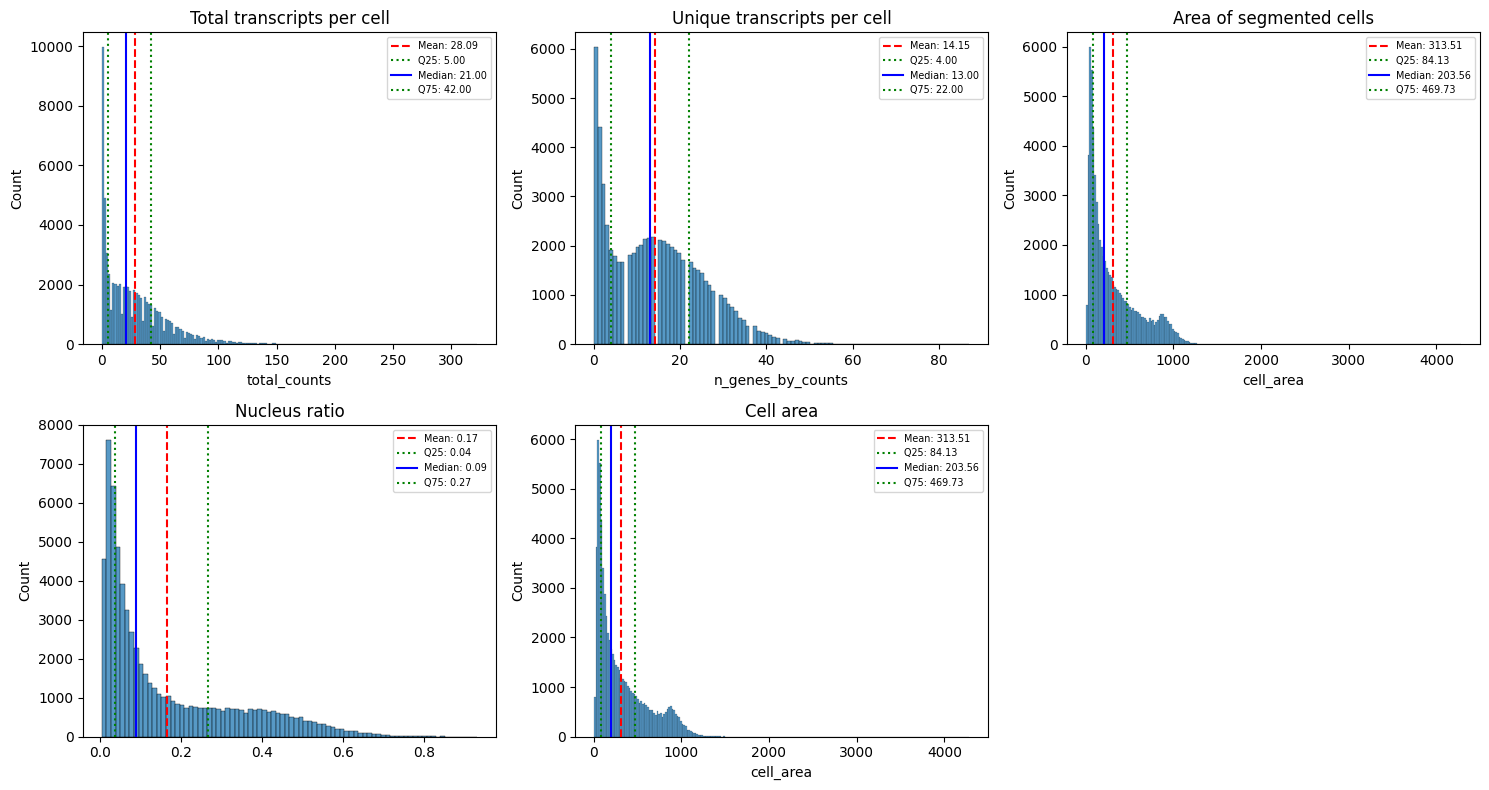

In [22]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8))  # 2 rows, 3 columns
axs = axs.flatten()  # Flatten to 1D list for easy iteration

plot_vars = [
    ("Total transcripts per cell", "total_counts"),
    ("Unique transcripts per cell", "n_genes_by_counts"),
    ("Area of segmented cells", "cell_area"),
    ("Nucleus ratio", adata.obs["nucleus_area"] / adata.obs["cell_area"]),
    ("Cell area", "cell_area")
]

for ax, (title, var) in zip(axs, plot_vars):
    # Extract series
    values = adata.obs[var] if isinstance(var, str) else var
    
    # Plot histogram
    sns.histplot(values, kde=False, ax=ax)
    ax.set_title(title)
    
    # Calculate mean and quantiles
    mean_val = values.mean()
    q25, q50, q75 = np.percentile(values.dropna(), [25, 50, 75])
    
    # Add lines
    ax.axvline(mean_val, color='red', linestyle='--', label=f"Mean: {mean_val:.2f}")
    ax.axvline(q25, color='green', linestyle=':', label=f"Q25: {q25:.2f}")
    ax.axvline(q50, color='blue', linestyle='-', label=f"Median: {q50:.2f}")
    ax.axvline(q75, color='green', linestyle=':', label=f"Q75: {q75:.2f}")
    
    ax.legend(fontsize='x-small')

# Remove empty subplot if extra
if len(plot_vars) < len(axs):
    for ax in axs[len(plot_vars):]:
        ax.remove()

plt.tight_layout()
plt.show()


In [23]:
sc.pp.filter_cells(adata, min_counts=5) # Minimum number of counts required for a cell to pass filtering.
sc.pp.filter_genes(adata, min_cells=5) # Minimum number of cells expressed required for a gene to pass filtering

In [25]:
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

Visualise annotation on UMAP and spatial coordinates

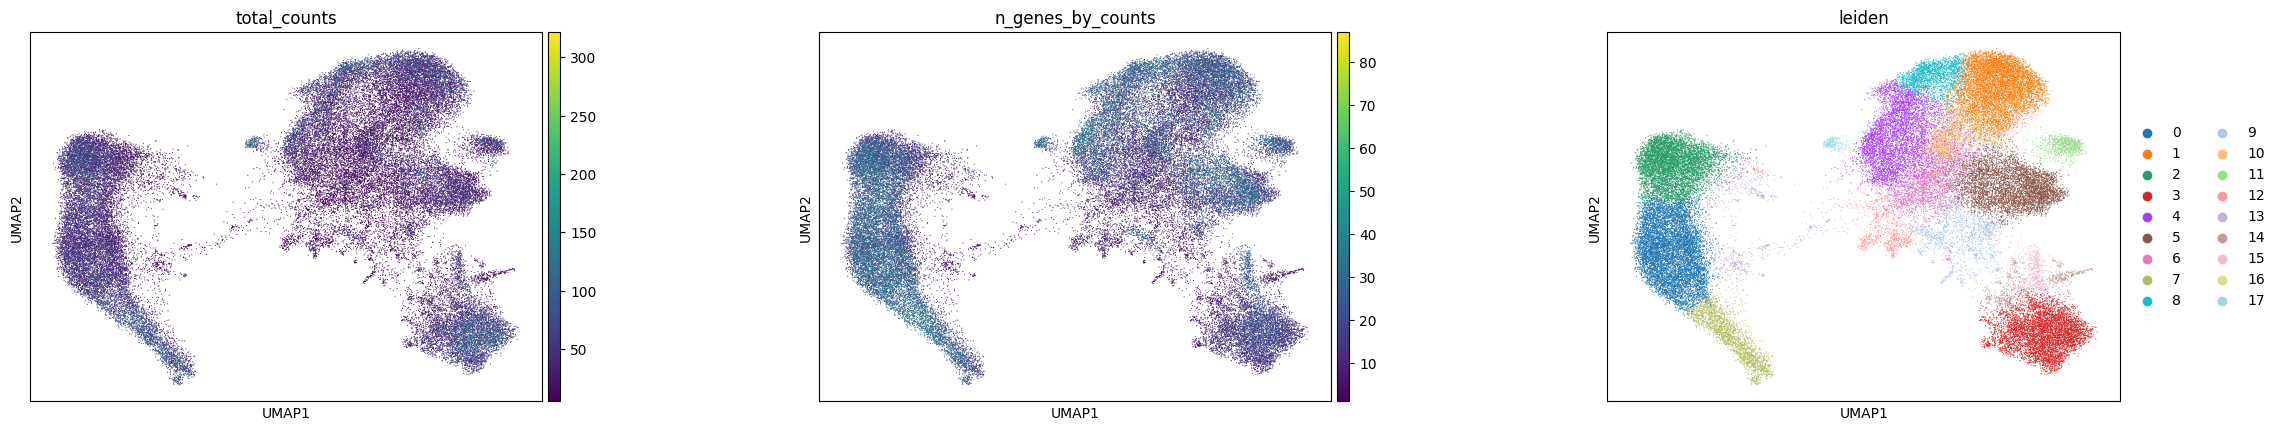

In [26]:
sc.pl.umap(
    adata,
    color=[
        "total_counts",
        "n_genes_by_counts",
        "leiden",
    ],
    wspace=0.4,
)

c:\Users\sevco\Documents\dimplomka\gitRepo\Keratoacanthoma_spatial_transcriptomics\venv\Lib\site-packages\squidpy\pl\_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


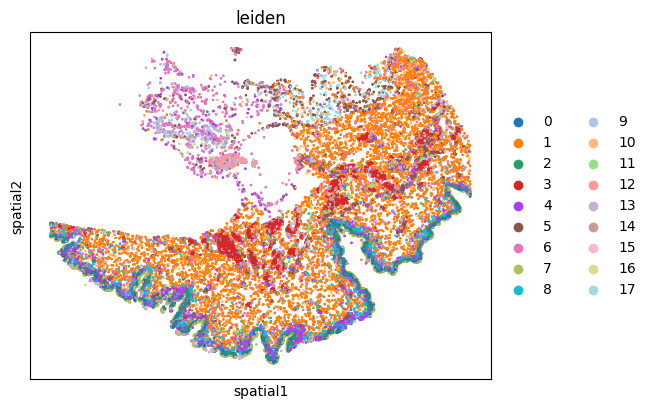

In [27]:
sq.pl.spatial_scatter(
    adata,
    library_id="spatial",
    shape=None,
    color=[
        "leiden",
    ],
    wspace=0.4,
)

Spatial neighborhood graph

In [28]:
sq.gr.spatial_neighbors(adata, coord_type="generic", delaunay=True)


In [29]:
sq.gr.centrality_scores(adata, cluster_key="leiden")


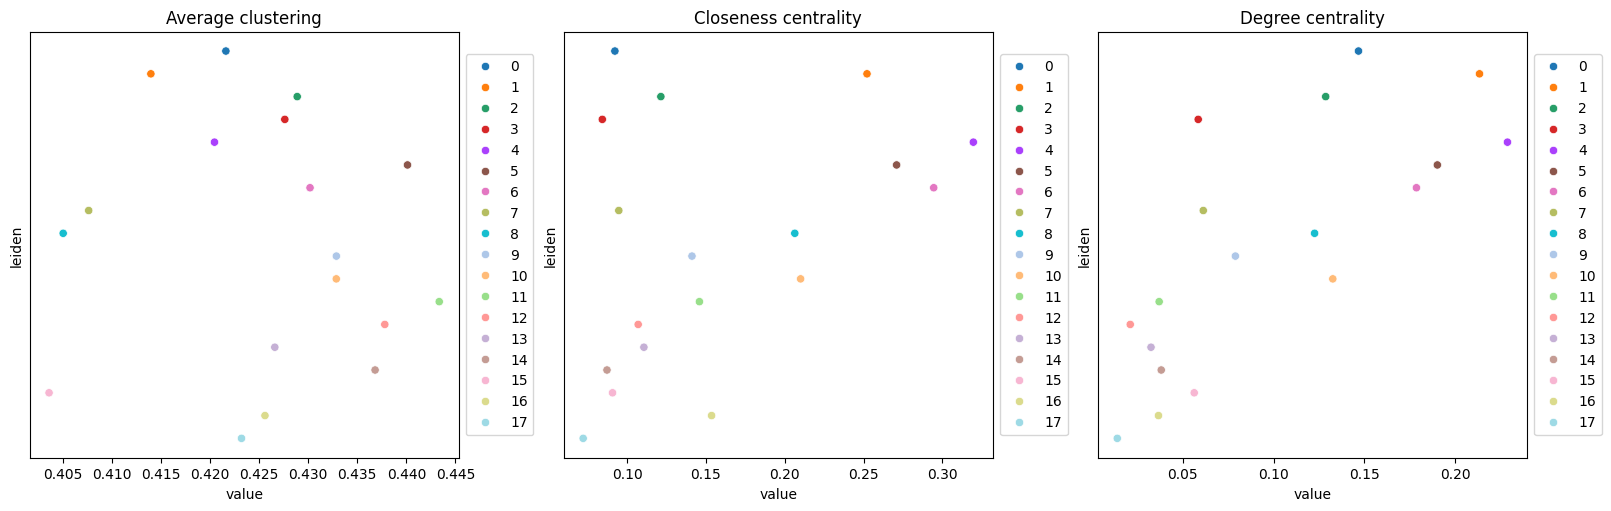

In [30]:
sq.pl.centrality_scores(adata, cluster_key="leiden", figsize=(16, 5))


Co-occurance probability

In [31]:
sdata.tables["subsample"] = sc.pp.subsample(adata, fraction=0.5, copy=True)


In [32]:
adata_subsample = sdata.tables["subsample"]


100%|██████████| 91/91 [01:27<00:00,  1.04/s]


c:\Users\sevco\Documents\dimplomka\gitRepo\Keratoacanthoma_spatial_transcriptomics\venv\Lib\site-packages\squidpy\pl\_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


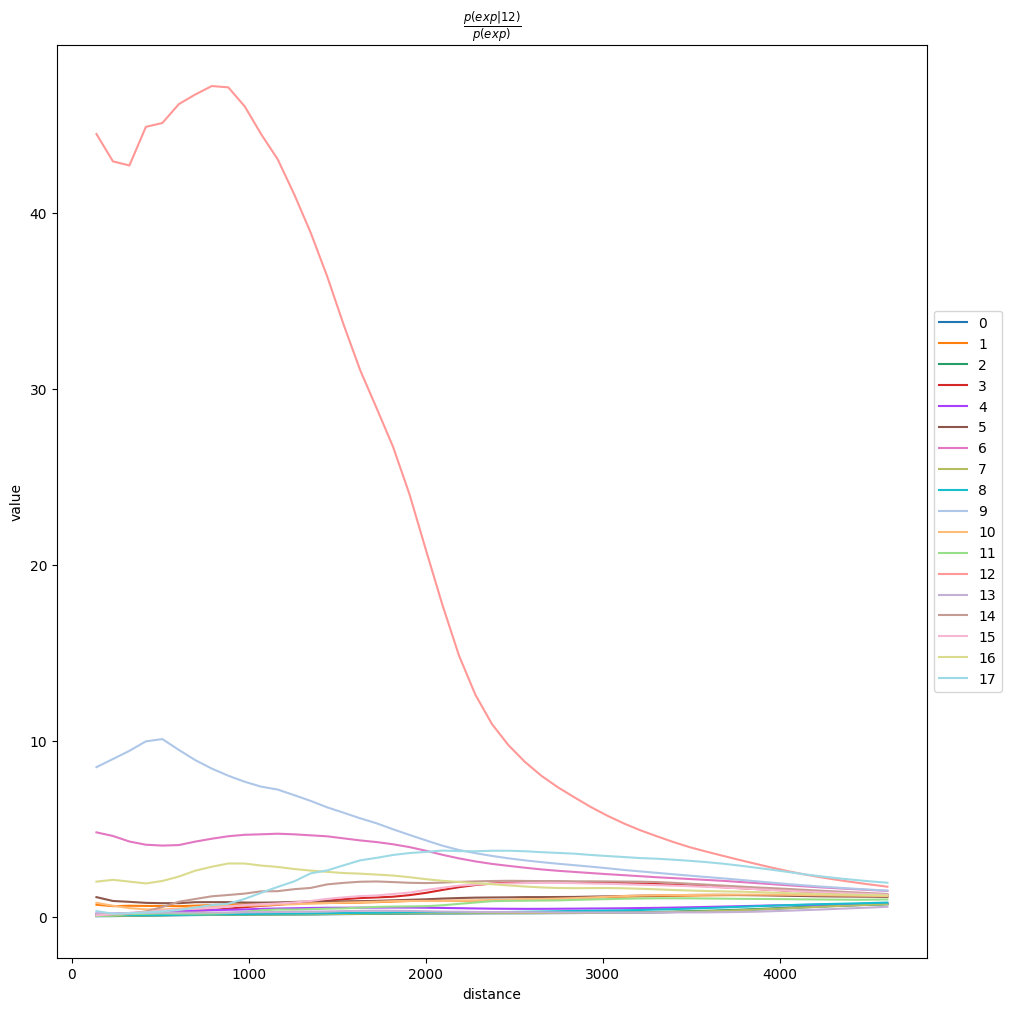

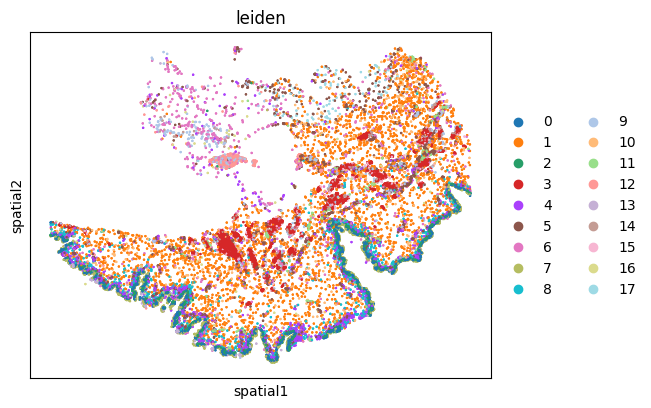

In [33]:
sq.gr.co_occurrence(
    adata_subsample,
    cluster_key="leiden",
)
sq.pl.co_occurrence(
    adata_subsample,
    cluster_key="leiden",
    clusters="12",
    figsize=(10, 10),
)
sq.pl.spatial_scatter(
    adata_subsample,
    color="leiden",
    shape=None,
    size=2,
)

Neighbors enrichment analysis


In [34]:
sq.gr.nhood_enrichment(adata, cluster_key="leiden")


100%|██████████| 1000/1000 [00:08<00:00, 116.37/s]


c:\Users\sevco\Documents\dimplomka\gitRepo\Keratoacanthoma_spatial_transcriptomics\venv\Lib\site-packages\squidpy\pl\_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


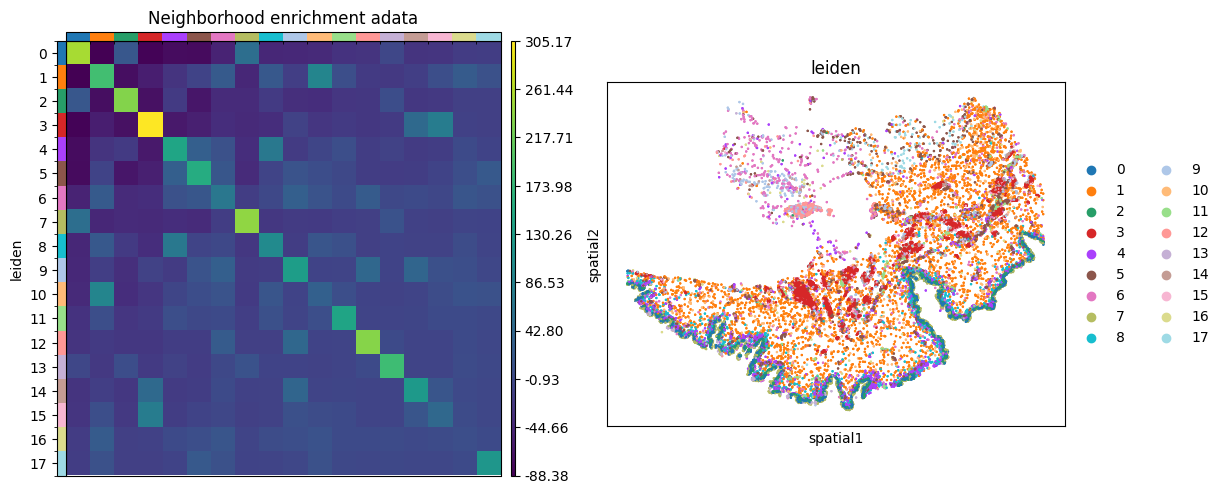

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(13, 7))
sq.pl.nhood_enrichment(
    adata,
    cluster_key="leiden",
    figsize=(8, 8),
    title="Neighborhood enrichment adata",
    ax=ax[0],
)
sq.pl.spatial_scatter(adata_subsample, color="leiden", shape=None, size=2, ax=ax[1])

Compute Moran’s I score

In [36]:
sq.gr.spatial_neighbors(adata_subsample, coord_type="generic", delaunay=True)
sq.gr.spatial_autocorr(
    adata_subsample,
    mode="moran",
    n_perms=100,
    n_jobs=1,
)
adata_subsample.uns["moranI"].head(10)

100%|██████████| 100/100 [00:29<00:00,  3.35/s]


,I,pval_norm,var_norm,pval_z_sim,pval_sim,var_sim,pval_norm_fdr_bh,pval_z_sim_fdr_bh,pval_sim_fdr_bh
DES,0.764938,0.0,0.000013,0.0,0.009901,0.000023,0.0,0.0,0.012739
MYH11,0.725158,0.0,0.000013,0.0,0.009901,0.000026,0.0,0.0,0.012739
CNN1,0.613563,0.0,0.000013,0.0,0.009901,0.000018,0.0,0.0,0.012739
COL17A1,0.602694,0.0,0.000013,0.0,0.009901,0.000031,0.0,0.0,0.012739
ABCC11,0.564029,0.0,0.000013,0.0,0.009901,0.000021,0.0,0.0,0.012739
ACTG2,0.558253,0.0,0.000013,0.0,0.009901,0.000020,0.0,0.0,0.012739
CLCA2,0.543905,0.0,0.000013,0.0,0.009901,0.000018,0.0,0.0,0.012739
MYLK,0.539293,0.0,0.000013,0.0,0.009901,0.000018,0.0,0.0,0.012739
ACTA2,0.531844,0.0,0.000013,0.0,0.009901,0.000018,0.0,0.0,0.012739
APCDD1,0.521473,0.0,0.000013,0.0,0.009901,0.000020,0.0,0.0,0.012739


<Axes: >

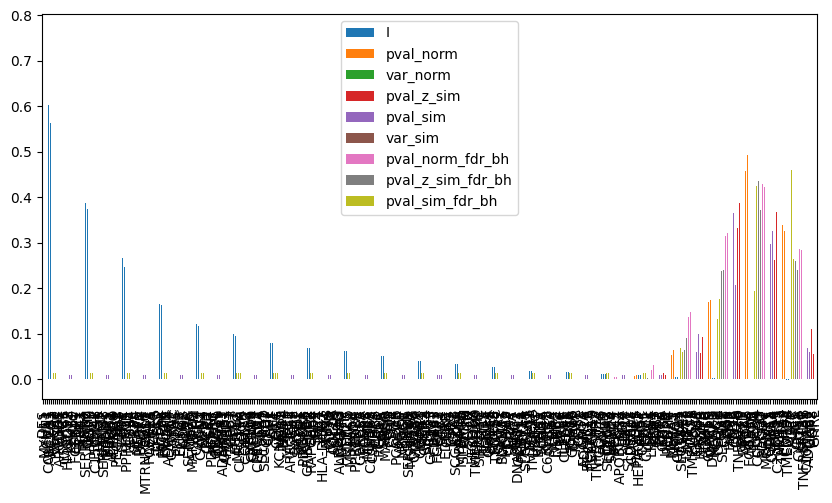

In [39]:
adata_subsample.uns["moranI"].plot(kind="bar", figsize=(10, 5))

In [41]:
adata_subsample.uns["moranI"]



,I,pval_norm,var_norm,pval_z_sim,pval_sim,var_sim,pval_norm_fdr_bh,pval_z_sim_fdr_bh,pval_sim_fdr_bh
DES,0.764938,0.000000,0.000013,0.000000,0.009901,0.000023,0.000000,0.000000,0.012739
MYH11,0.725158,0.000000,0.000013,0.000000,0.009901,0.000026,0.000000,0.000000,0.012739
CNN1,0.613563,0.000000,0.000013,0.000000,0.009901,0.000018,0.000000,0.000000,0.012739
COL17A1,0.602694,0.000000,0.000013,0.000000,0.009901,0.000031,0.000000,0.000000,0.012739
ABCC11,0.564029,0.000000,0.000013,0.000000,0.009901,0.000021,0.000000,0.000000,0.012739
...,...,...,...,...,...,...,...,...,...
C1orf194,-0.003207,0.190995,0.000013,0.117909,0.069307,0.000009,0.216883,0.134703,0.080894
ADGRE1,-0.003329,0.181899,0.000013,0.083817,0.059406,0.000005,0.207178,0.097227,0.069553
GKN2,-0.003445,0.173614,0.000013,0.111397,0.089109,0.000007,0.198943,0.127649,0.102734
AQP8,-0.004236,0.123359,0.000013,0.055212,0.049505,0.000007,0.146708,0.065603,0.059061


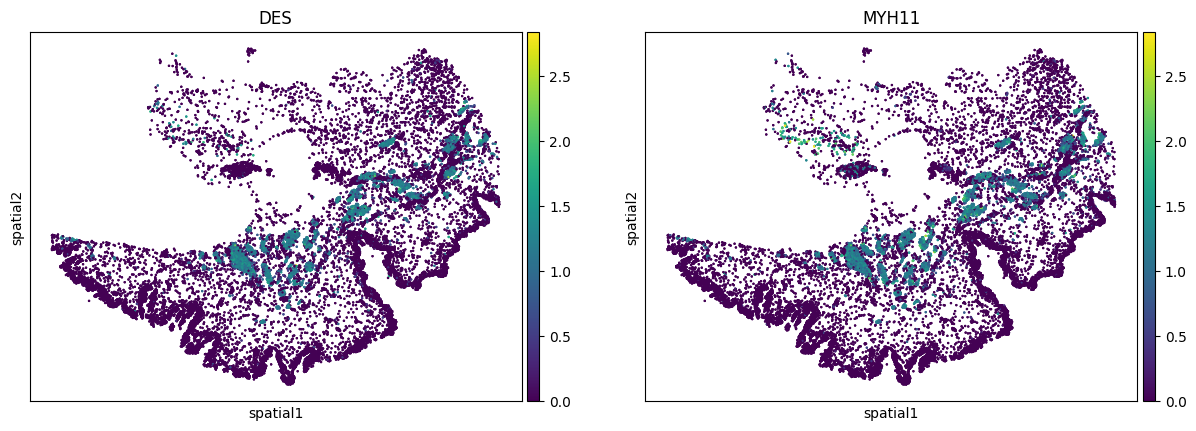

In [50]:
sq.pl.spatial_scatter(
    adata_subsample,
    library_id="spatial",
    color=[
        "DES",
        "MYH11",
    ],
    shape=None,
    size=2,
    img=False,
)